# EM1405-2 - DATA ANALYTICS AND ARTIFICIAL INTELLIGENCE




---

Daniele Barbato - 883661

Nicolae Bologa -

Antonella Facini - 900455

Sergiu Nica -

----


## IMAGE CLASSIFICATION: PLANT DESEASE DETECTION

### Research Question and Project Overview

Image classification using Convolutional Neural Networks (CNNs) has proven to be highly effective in recognizing patterns and diagnosing plant diseases from leaf images. It has been increasingly implemented both in research settings and within the agricultural industry, particularly in modern cropping systems.

The goal of this project is to explore and evaluate the performance of different CNN-based approaches to classify plant diseases, using the PlantVillage dataset.

The project is structured into three main parts.
- **Custom CNN from scratch**: After multiple iterations and hyperparameters tuning, we selected and presented the best-performing architecture based on its validation accuracy and generalization performance.

- **Transfer Learning and ResNet50**: pre-trained convolutional networks were used. After several tests, ResNet50 was chosen to be reported. The ResNet50-based model significantly improved classification results compared to our custom architecture.

- **GradCam and Interpretability**: a Grad-CAM (Gradient-weighted Class Activation Mapping) was applied. This technique allowed us to visualize the regions of each image that contributed most to the models' predictions, providing insights into the decision-making process of our models.


### About the dataset: PlantVillage

To train and evaluate our models, we used the ***PlantVillage dataset***.

The dataset contains **54.305 labeled images** of healthy and diseased plant leaves.

The images span across **38 different classes** that include various crops, such as apple, tomato, grape, and corn, each affected by different diseases or appearing healthy.

Each image in the dataset is a close-up of a single leaf, taken against a mostly uniform background to ensure clarity and focus on the disease symptoms.

All images are **RGB** and have a fixed **size** of **256×256 pixels**.

The **dataset is balanced** across many of the classes, making it suitable for deep learning models.

The images are organized in a main directory named **PlantVillage**, which is divided into two subfolders:
- ***train***
- ***val***

Each of these subfolders contains 38 class-specific folders, corresponding to the different types of plant leaves (healthy and diseased).


*Source: https://github.com/spMohanty/PlantVillage-Dataset*

### Data Preparation

In [ ]:
# If working from Collab - Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip dataset
!unzip '/content/drive/MyDrive/Colab Notebooks/IMG - DTC/Dataset'

Output streaming troncato alle ultime 5000 righe.
  inflating: PlantVillage/val/Soybean___healthy/52c7d07b-561b-4380-801a-3824e65a5135___RS_HL 3797.JPG  
  inflating: PlantVillage/val/Soybean___healthy/53168d1c-ac90-4039-9eff-7479475a6b74___RS_HL 6355.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5344b09f-bbbe-4a2c-9345-d93dd4e69eb4___RS_HL 4693.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5361ba4a-351e-466c-99c5-8845f35c00df___RS_HL 2890.JPG  
  inflating: PlantVillage/val/Soybean___healthy/537e5409-d824-4859-967f-3c502f13deec___RS_HL 5474.JPG  
  inflating: PlantVillage/val/Soybean___healthy/538969da-545b-4bce-bc1d-0932898dc5e6___RS_HL 5230.JPG  
  inflating: PlantVillage/val/Soybean___healthy/538ccfe2-1509-40d7-beae-ae7cf84e1e5d___RS_HL 3717.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5397bf6a-aeeb-4f1c-b554-bdb604bb23c3___RS_HL 6508.JPG  
  inflating: PlantVillage/val/Soybean___healthy/53dc0466-621c-43e1-9c5e-e340f3d50171___RS_HL 6381.JPG  
  inflating: P

In [ ]:
# Set directories
val_dir= '/content/PlantVillage/val'

train_dir='/content/PlantVillage/train'

For model evaluation we need three subsets:


*   Training Set: to train the model
*   Validation Set: to tune hyperparameters and check for overfitting under training.
*   Test Set: to evaluate the model's performance on completely unseen data.

The dataset provides only two splits: *train* and *val*.

The validation set is further split into:

*  A smaller validation subset
*  A test subset

A function (*split_data*) is created to perform the split, which by default assigns 20% of each class to the test set and 80% to the validation set.

In [ ]:
import os
import shutil
import random


# Define paths for the new subdirectories
val_dir_original = val_dir
val_dir_new= os.path.join(val_dir_original,'val') # new subdirectory for validation
test_dir= os.path.join(val_dir_original,'test') # new subdirectory for test

# Create the new subdirectories
os.makedirs(val_dir_new, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split data into subdirectories
def split_data(source_dir, val_dir, test_dir, test_split=0.2):

    """
    Splits data into validation and test subdirectories.

    Args:
        source_dir: Path to the source directory containing class folders.
        val_dir: Path to the validation subdirectory.
        test_dir: Path to the test subdirectory.
        test_split: Fraction of data to use for testing (default: 0.2).

    """

    all_items= os.listdir(source_dir)

    # Filter out 'test' and 'val' from the list of items to process
    class_names= [item for item in all_items if item not in ('test', 'val')]

    # Iterate through filtered class names
    for class_name in class_names:
        class_dir = os.path.join(source_dir, class_name) #path to access the specific directory
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            random.shuffle(images)
            split_index = int(len(images) * (1 - test_split))
            val_images = images[:split_index]
            test_images = images[split_index:]

            for image in val_images:
                src_path = os.path.join(class_dir, image)
                dest_path = os.path.join(val_dir, class_name, image)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)  # Create class folder in val_dir
                shutil.copy(src_path, dest_path)

            for image in test_images:
                src_path = os.path.join(class_dir, image) #where to find the image
                dest_path = os.path.join(test_dir, class_name, image) #where i want it to be
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)  # Create class folder in test_dir
                shutil.copy(src_path, dest_path) #copy/paste

# Split the validation data into val and test subdirectories
split_data(val_dir_original, val_dir_new, test_dir, test_split=0.2)

In [ ]:
# Image Distribution by Set
def count_total_images(directory):
    print(f"\nImage count in: {directory}")
    total = 0
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            total += len(os.listdir(class_path))
    print(f"Total images: {total}")


count_total_images(train_dir)
count_total_images(val_dir_new)
count_total_images(test_dir)



Image count in: /content/PlantVillage/train
Total images: 43444

Image count in: /content/PlantVillage/val/val
Total images: 8676

Image count in: /content/PlantVillage/val/test
Total images: 2185


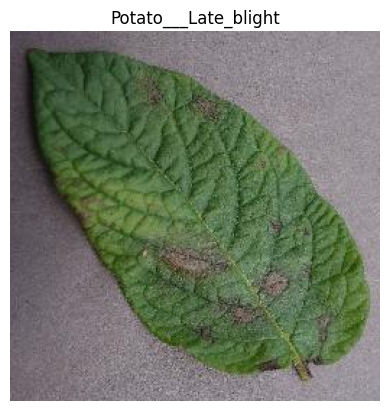

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set a sample directory (train/val/test)
sample_dir = train_dir

# Pick a random class and image
class_name = random.choice(os.listdir(sample_dir))
class_path = os.path.join(sample_dir, class_name)
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f"{class_name}")
plt.axis('off')
plt.show()


In [ ]:
# Display image shape
print(img.shape)

(256, 256, 3)


### Data augmentation

To efficiently feed our models with image data, we used **ImageDataGenerators** provided by Keras.

These generators handle real-time image loading and preprocessing, helping reduce memory usage.

At this stage we:

- Rescaled pixel values to the 0 -1 range, which standardizes the input data for improved training stability.

- Organized data into batches, which enables efficient GPU processing.

- Set a target size of 224×224 pixels to align with input requirements of pre-trained CNN models (e.g. ResNet50)

In the beginning heavier augmentation was implemented (flip, rotation, etc.). It was not included since it would worsen our results.

*Data augmentation is not applied to the validatio and test set, as the purpose of testing is to evaluate model performance on unaltered, unseen data.*

In [ ]:
#Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import seaborn as sns
import pandas as pd

import csv
from datetime import datetime
import matplotlib.pyplot as plt
from pathlib import Path

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from tqdm import tqdm

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

import os

# import matplotlib.pyplot as plt
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.layers import Dense,Conv2D
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, classification_report
# import pandas as pd
# import csv
# from datetime import datetime
# import matplotlib.pyplot as plt
# from pathlib import Path
# import torch
# from torch import nn, optim
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms, models
# from tqdm import tqdm

In [ ]:
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  #  rotation_range=20,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                  #  shear_range=0.2,
                                  #  zoom_range=0.2,
                                  #  horizontal_flip=True
                                   )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)


# Creating Train, Validation and Test Generators
batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir_new,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

# Define number of classes based on dataset structure
num_classes = len(val_generator.class_indices)  # Number of classes from data generator

# Define name of the classes (labels)
class_names=list(val_generator.class_indices.keys())
print(class_names)

Found 43444 images belonging to 38 classes.
Found 8676 images belonging to 38 classes.
Found 2185 images belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_

### Part 1: Custom CNN from scratch

#### Model Training

The architecture of our first model is a simple but effective deep learning structure, gradually increasing in complexity across layers.

Our model begins with an input shape of 224×224×3, corresponding to RGB images.

It stacks three convolutional blocks, each consisting of:

- A Conv2D layer with increasing filters (16, 32, 64),

- Followed by ReLU activation,

- L2 regularization to prevent overfitting,

- And a Batch Normalization layer to stabilize and accelerate training.

Each block ends with a MaxPooling2D layer.

After feature extraction, the output is flattened and passed through a fully connected Dense layer with 128 units.

Finally, a Dense output layer with **softmax activation** maps the features to one of the available leaf classes.

The model is compiled with the Adam optimizer and uses categorical crossentropy as the loss function (because of the purpose of our task: multi-class classification).

Additionally, we employed three key callbacks: EarlyStopping, ModelCheckpoint, and ReduceLROnPlateau, to improve training stability and avoid overfitting.

In [ ]:
# Define callbacks
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Define model
class_count = num_classes
input_shape = (224, 224, 3)

model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.001)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.001)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.001)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.0001)),
    layers.Dense(class_count, activation='softmax'),
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,566,854 (21.24 MB)

 Trainable params: 5,566,630 (21.24 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# Model Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stopping_callback, model_checkpoint, reduce_lr])

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 103s 70ms/step - accuracy: 0.6837 - loss: 1.2895 - val_accuracy: 0.8573 - val_loss: 0.6047 - learning_rate: 1.0000e-04
Epoch 2/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 77ms/step - accuracy: 0.9308 - loss: 0.3231 - val_accuracy: 0.8974 - val_loss: 0.4649 - learning_rate: 1.0000e-04
Epoch 3/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 107s 78ms/step - accuracy: 0.9688 - loss: 0.1986 - val_accuracy: 0.8752 - val_loss: 0.5902 - learning_rate: 1.0000e-04
Epoch 4/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 72ms/step - accuracy: 0.9787 - loss: 0.1648 - val_accuracy: 0.8926 - val_loss: 0.5772 - learning_rate: 1.0000e-04
Epoch 5/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 71ms/step - accuracy: 0.9806 - loss: 0.1617 - val_accuracy: 0.9093 - val_loss: 0.5067 - learning_rate: 1.0000e-04
Epoch 6/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 103s 76ms/step - accuracy: 0.9928 - loss: 0.1238 - val_accuracy: 0.9360 - val_loss: 0.3750 - learning_rate: 2.0000e-05
Epoch 7/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 127s

In [ ]:
# Definition of a function for plotting training and validation metrics
def plot_training(hist):

    # Variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    Epochs = [i+1 for i in range(len(tr_acc))]

    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

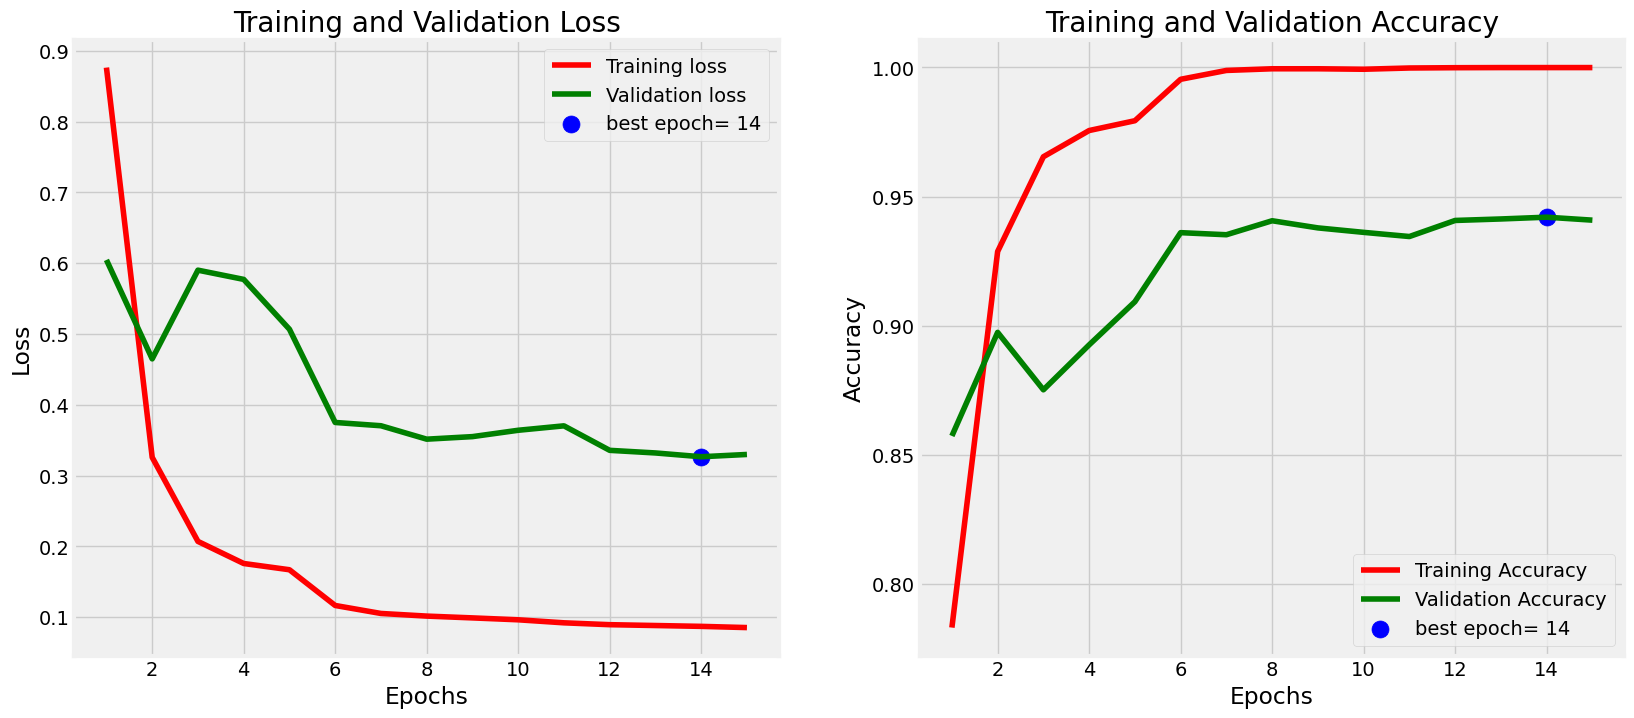

In [ ]:
# Plot training and validation metrics
plot_training(history)

In [ ]:
# FUNCTIONAL API - FOR GRADCAM USE
# Define callbacks
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_scratch_functional.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Model parameters
class_count = num_classes
input_shape = (224, 224, 3)

# Functional API model
inputs = Input(shape=input_shape)

x = layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
outputs = layers.Dense(class_count, activation='softmax')(x)

functional_model = models.Model(inputs=inputs, outputs=outputs)

# Compile
functional_model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

functional_model.summary()

# Model Training
history = functional_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stopping_callback, model_checkpoint, reduce_lr])


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,566,854 (21.24 MB)

 Trainable params: 5,566,630 (21.24 MB)

 Non-trainable params: 224 (896.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 72ms/step - accuracy: 0.6506 - loss: 1.4059 - val_accuracy: 0.8624 - val_loss: 0.5724 - learning_rate: 1.0000e-04
Epoch 2/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9128 - loss: 0.3782 - val_accuracy: 0.8723 - val_loss: 0.5599 - learning_rate: 1.0000e-04
Epoch 3/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.9629 - loss: 0.2104 - val_accuracy: 0.8618 - val_loss: 0.6152 - learning_rate: 1.0000e-04
Epoch 4/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9762 - loss: 0.1685 - val_accuracy: 0.8950 - val_loss: 0.5125 - learning_rate: 1.0000e-04
Epoch 5/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.9802 - loss: 0.1590 - val_accuracy: 0.9050 - val_loss: 0.5011 - learning_rate: 1.0000e-04
Epoch 6/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9838 - loss: 0.1499 - val_accuracy: 0.8978 - val_loss: 0.5913 - learning_rate: 1.0000e-04
Epoch 7/15
1358/1358 ━━━━━━━━━━━━━━━━━

In [ ]:
# Save the trained model to Google Drive
functional_model.save('/content/drive/MyDrive/functional_custom_model.keras')

#### Evaluation on the Test set

In [ ]:
# Testing
test_score= model.evaluate(test_generator)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 1/69 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8750 - loss: 0.5513

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9360 - loss: 0.3440
Test Loss:  0.3390415906906128
Test Accuracy:  0.9359267950057983


#### Classification Report

In [ ]:
# Reset the test generator to ensure same ordering
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator.reset()

# Make predictions: running the model on test set, 2D array with predicted proabilities for each image
preds = model.predict(test_generator)

# Predicted class indices (highest probability): it finds the highest value along columns and returns the corresponding index
y_pred = np.argmax(preds, axis=1)

Found 2185 images belonging to 38 classes.
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step


In [ ]:
# Print a few predictions and true labels
class_dict = test_generator.class_indices
labels = list(class_dict.keys())

for i in range(10):
    print(f"Prediction: {labels[y_pred[i]]}, True Label: {labels[test_generator.classes[i]]}")

Prediction: Cherry_(including_sour)___Powdery_mildew, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab


In [ ]:
# Classification report
print(classification_report(test_generator.classes, y_pred, target_names= labels))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.73      0.85      0.79        26
                                 Apple___Black_rot       0.93      1.00      0.96        25
                          Apple___Cedar_apple_rust       0.90      0.82      0.86        11
                                   Apple___healthy       0.95      0.92      0.94        66
                               Blueberry___healthy       0.94      0.98      0.96        60
          Cherry_(including_sour)___Powdery_mildew       0.93      0.95      0.94        42
                 Cherry_(including_sour)___healthy       0.97      0.97      0.97        34
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.77      0.81      0.79        21
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99        48
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.80      0.

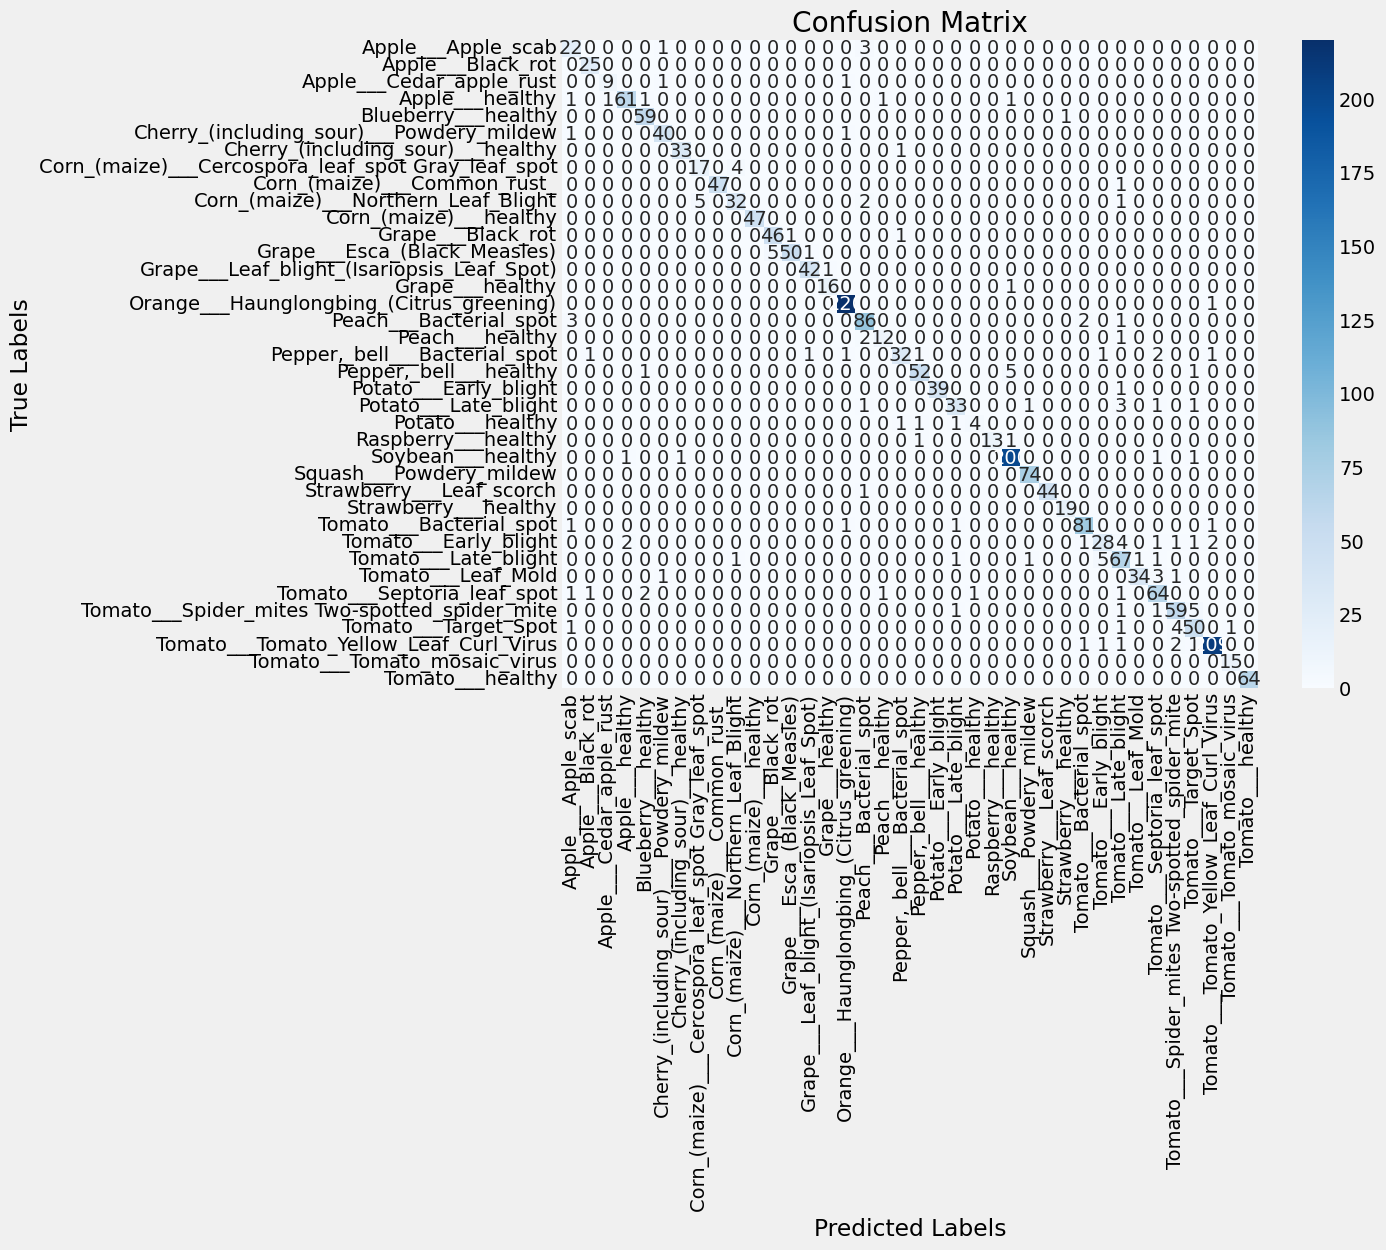

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_generator.classes, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Part 2.1: Transfer Learning and ResNet50 (Keras)

After building and training our own CNN from scratch, we were eager to explore whether using pretrained convolutional models could boost performance on our plant disease classification task.

We experimented with several widely adopted architectures, including VGG16, InceptionV3, MobileNetV2, and DenseNet121.

After several trials, we selected ResNet50 as the final choice for our model.

#### Model Training

In [ ]:
# Set up
train_dir
val_dir_new
test_dir

img_size = (224, 224)
batch_size = 32

# Data Augmentation
resnet_train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.2,
)

resnet_val_datagen = ImageDataGenerator(rescale=1./255)

resnet_train_generator = resnet_train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

resnet_val_generator = resnet_val_datagen.flow_from_directory(
    val_dir_new,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

resnet_test_generator = resnet_val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = resnet_train_generator.num_classes

Found 43444 images belonging to 38 classes.
Found 8676 images belonging to 38 classes.
Found 2185 images belonging to 38 classes.


In [ ]:
# Define model checkpoint
model_checkpoint = ModelCheckpoint('resnet50_plant_disease.keras', monitor='val_loss', save_best_only=True)

# Model Creation using ResNet50 (functional API)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.summary()

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,665,574 (90.28 MB)

 Trainable params: 23,612,454 (90.07 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Train
history = model.fit(
    resnet_train_generator,
    validation_data= resnet_val_generator,
    epochs=6,
    callbacks=[model_checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 750s 508ms/step - accuracy: 0.8833 - loss: 0.4445 - val_accuracy: 0.9657 - val_loss: 0.1199
Epoch 2/6
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 693s 491ms/step - accuracy: 0.9836 - loss: 0.0521 - val_accuracy: 0.9841 - val_loss: 0.0579
Epoch 3/6
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 703s 507ms/step - accuracy: 0.9885 - loss: 0.0359 - val_accuracy: 0.9869 - val_loss: 0.0373
Epoch 4/6
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 661s 486ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9829 - val_loss: 0.0487
Epoch 5/6
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 657s 483ms/step - accuracy: 0.9913 - loss: 0.0282 - val_accuracy: 0.9767 - val_loss: 0.0703
Epoch 6/6
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 657s 484ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9818 - val_loss: 0.0589


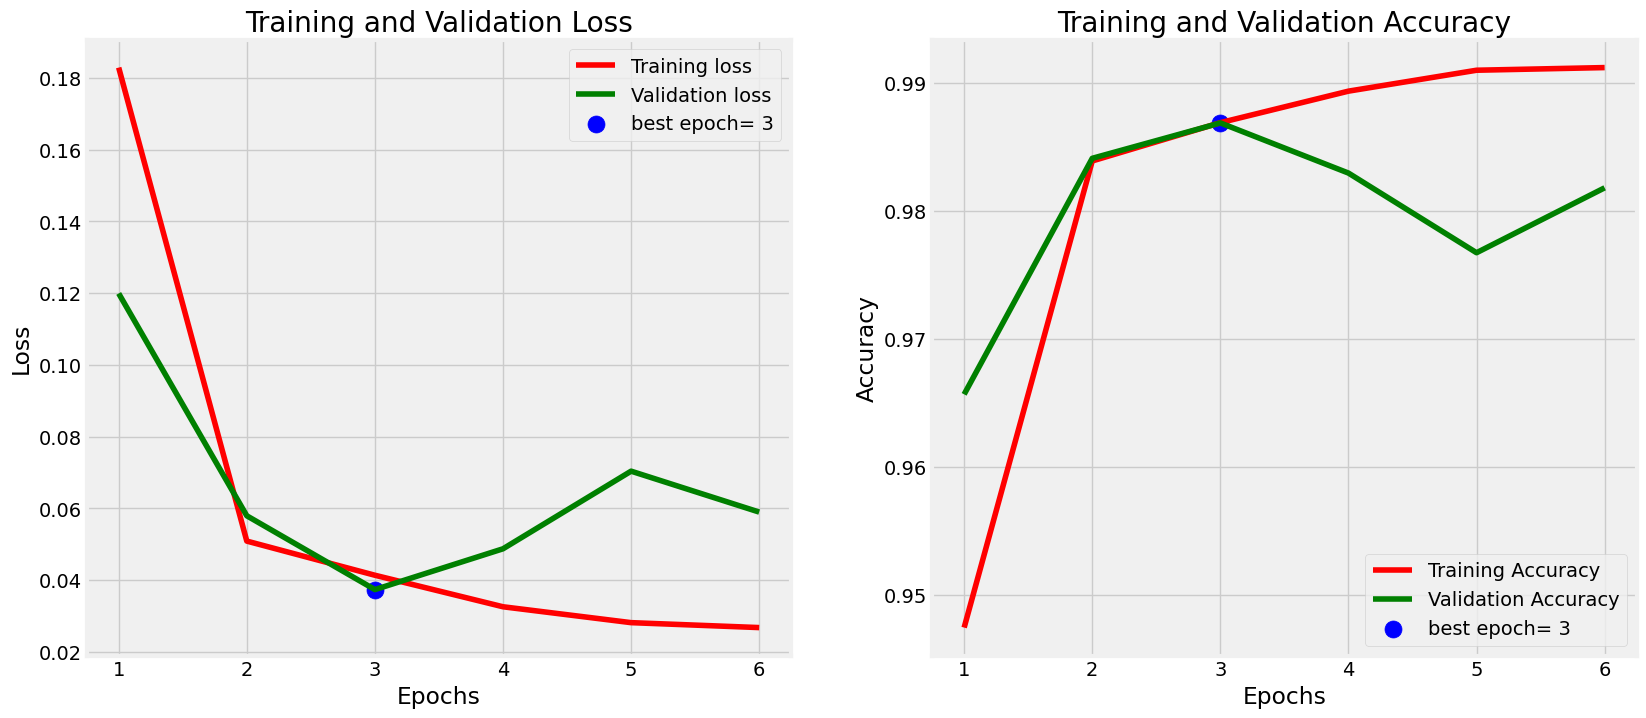

In [ ]:
# Plot training and validation metrics
plot_training(history)

In [ ]:
# Save the trained model to Google Drive
model.save('/content/drive/MyDrive/resnet50_plant_desease.keras')

#### Evaluation on the Test Set

In [ ]:
# Load model
# model = load_model('/content/drive/MyDrive/resnet50_plant_desease.keras')

In [ ]:
# Testing
test_score= model.evaluate(resnet_test_generator)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.9932 - loss: 0.0174
Test Loss:  0.022569313645362854
Test Accuracy:  0.9908466935157776


#### Classification Report

In [ ]:
# Reset the test generator to ensure same ordering
resnet_test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

resnet_test_generator.reset()

# Make predictions: running the model on test set, 2D array with predicted proabilities for each image
preds = model.predict(resnet_test_generator)

# Predicted class indices (highest probability): it finds the highest value along columns and returns the corresponding index
y_pred = np.argmax(preds, axis=1)

Found 2185 images belonging to 38 classes.
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step


In [ ]:
# Print a few predictions and true labels
class_dict = resnet_test_generator.class_indices
labels = list(class_dict.keys())

for i in range(10):
    print(f"Prediction: {labels[y_pred[i]]}, True Label: {labels[resnet_test_generator.classes[i]]}")

Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab
Prediction: Apple___Apple_scab, True Label: Apple___Apple_scab


In [ ]:
# Classification report
print(classification_report(resnet_test_generator.classes, y_pred, target_names= labels))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      1.00      0.98        26
                                 Apple___Black_rot       1.00      1.00      1.00        25
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        11
                                   Apple___healthy       0.99      1.00      0.99        66
                               Blueberry___healthy       1.00      0.98      0.99        60
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99        42
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00        34
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      1.00      0.98        21
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        48
               Corn_(maize)___Northern_Leaf_Blight       1.00      0.97      0.

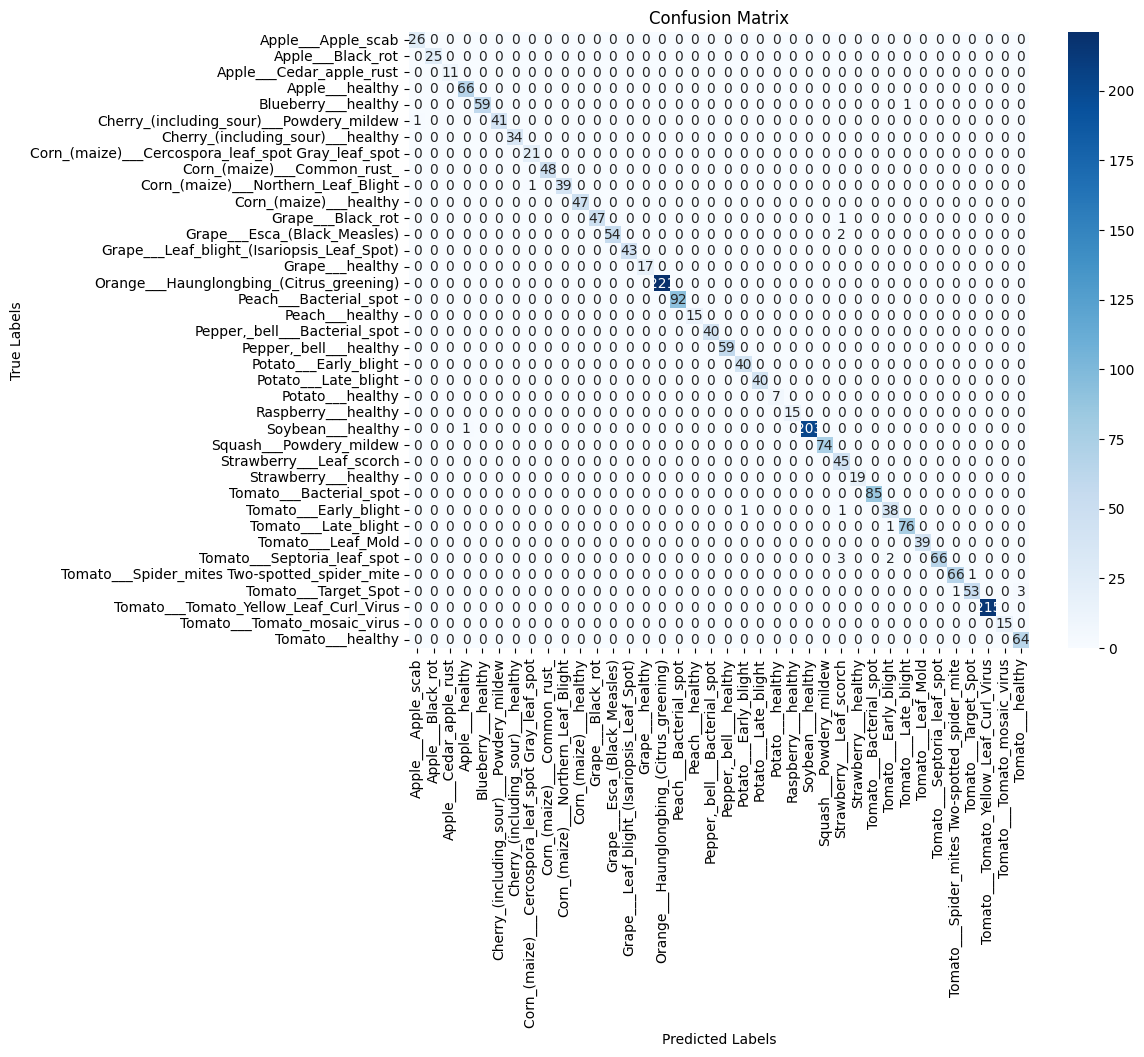

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(resnet_test_generator.classes, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Part 2.2: Transfer Learning and ResNet50 (Pytorch)

Since ResNet50 gave us solid results with Keras, we wanted to see how it would perform when built using another popular deep learning framework: PyTorch.

To keep things consistent, we used the exact same architecture and setup: same preprocessing, same image size, same number of classes. This also gave us the chance to get a bit more hands-on with the training process and see how PyTorch handles

#### Model Training

In [ ]:
# Set up
batch_size = 32
num_epochs = 6
lr = 1e-4
img_size= (224, 224)

log_dir= Path('logs')
log_dir.mkdir(exist_ok=True)


# Image Preprocessing: make images compatible with ImageNet
transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# List Directories
train_dir
val_dir_new

# Data Loading
train_dataset = datasets.ImageFolder(root= train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root= val_dir_new, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size= batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size= batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size= batch_size, shuffle=False)

In [ ]:
# Model Creation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(weights="IMAGENET1K_V1")

num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= lr)

# CSV logger
def init_csv_logger():
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_file = log_dir/ f"training_metrics_{timestamp}.csv"
    with open(csv_file, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Epoch', 'Train Loss', 'Train Acc', 'Val Loss', 'Val Acc', 'Best Val Acc'])
    return csv_file

def log_to_csv(csv_file, epoch, train_loss, train_acc, val_loss, val_acc, best_val_acc):
    with open(csv_file, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([
            epoch + 1,
            f"{train_loss:.4f}",
            f"{train_acc:.4f}",
            f"{val_loss:.4f}",
            f"{val_acc:.4f}",
            f"{best_val_acc:.4f}"
        ])

# Training loop
def train_model(model, train_loader, val_loader, device, num_epochs=10):
    csv_file = init_csv_logger()
    best_val_acc = 0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")

        # Print & Log
        print(f"\nEpoch {epoch+1}/{num_epochs} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
        log_to_csv(csv_file, epoch, train_loss, train_acc, val_loss, val_acc, best_val_acc)

    # Plot
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    print(f"\nBest val acc: {best_val_acc:.4f}")
    return model

# Plot Metrics Function
def plot_metrics(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.legend()
    plt.title("Loss over Epochs")

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.legend()
    plt.title("Accuracy over Epochs")

    plt.tight_layout()
    plt.show()


In [ ]:
# print(torch.cuda.is_available())
# print(torch.cuda.get_device_name(0))

Epoch 1/6: 100%|██████████| 1358/1358 [09:21<00:00,  2.42it/s]



Epoch 1/6 | Train Acc: 0.9493 | Val Acc: 0.9854


Epoch 2/6: 100%|██████████| 1358/1358 [09:19<00:00,  2.43it/s]



Epoch 2/6 | Train Acc: 0.9878 | Val Acc: 0.9776


Epoch 3/6: 100%|██████████| 1358/1358 [09:34<00:00,  2.36it/s]



Epoch 3/6 | Train Acc: 0.9896 | Val Acc: 0.9934


Epoch 4/6: 100%|██████████| 1358/1358 [09:36<00:00,  2.36it/s]



Epoch 4/6 | Train Acc: 0.9920 | Val Acc: 0.9929


Epoch 5/6: 100%|██████████| 1358/1358 [09:25<00:00,  2.40it/s]



Epoch 5/6 | Train Acc: 0.9933 | Val Acc: 0.9916


Epoch 6/6: 100%|██████████| 1358/1358 [09:09<00:00,  2.47it/s]



Epoch 6/6 | Train Acc: 0.9935 | Val Acc: 0.9949


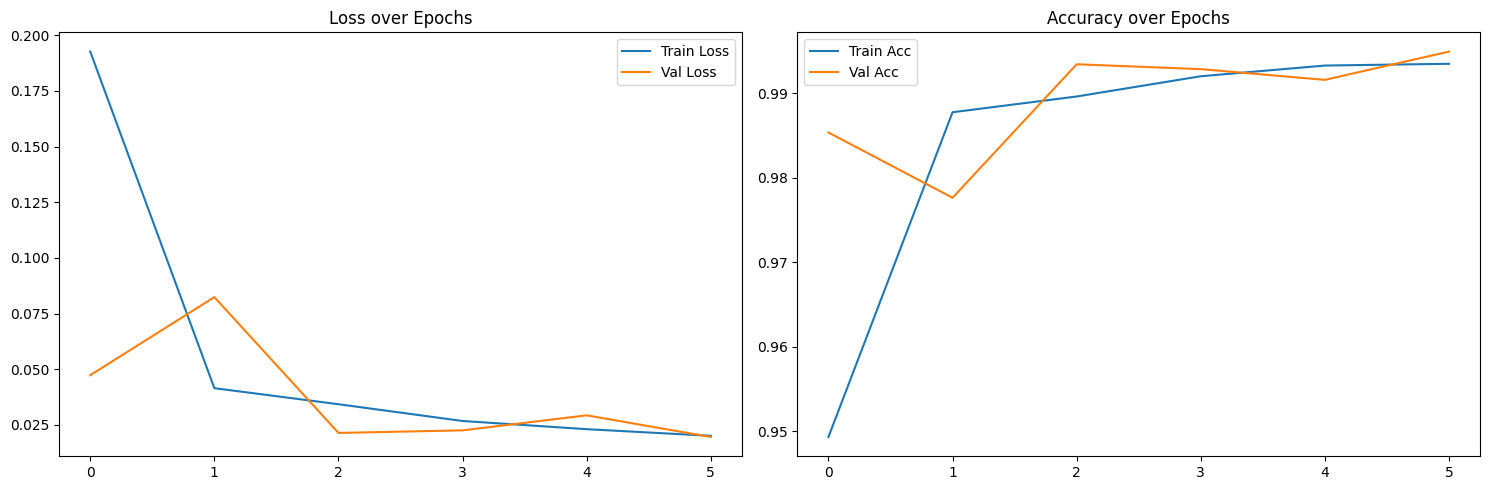


Training complete. Best val acc: 0.9949


In [ ]:
# Run training
trained_model = train_model(model, train_loader, val_loader, device, num_epochs= num_epochs)

#### Evaluation on the Test Set

In [ ]:
model.eval()

all_test_preds = []
all_test_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())


#### Classification Report

In [ ]:
# Class names
class_names = test_loader.dataset.classes

# Print classification report
print(classification_report(all_test_labels, all_test_preds, target_names=class_names))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00        26
                                 Apple___Black_rot       1.00      1.00      1.00        25
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        11
                                   Apple___healthy       1.00      1.00      1.00        66
                               Blueberry___healthy       1.00      1.00      1.00        60
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00        42
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00        34
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.86      0.90        21
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        48
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

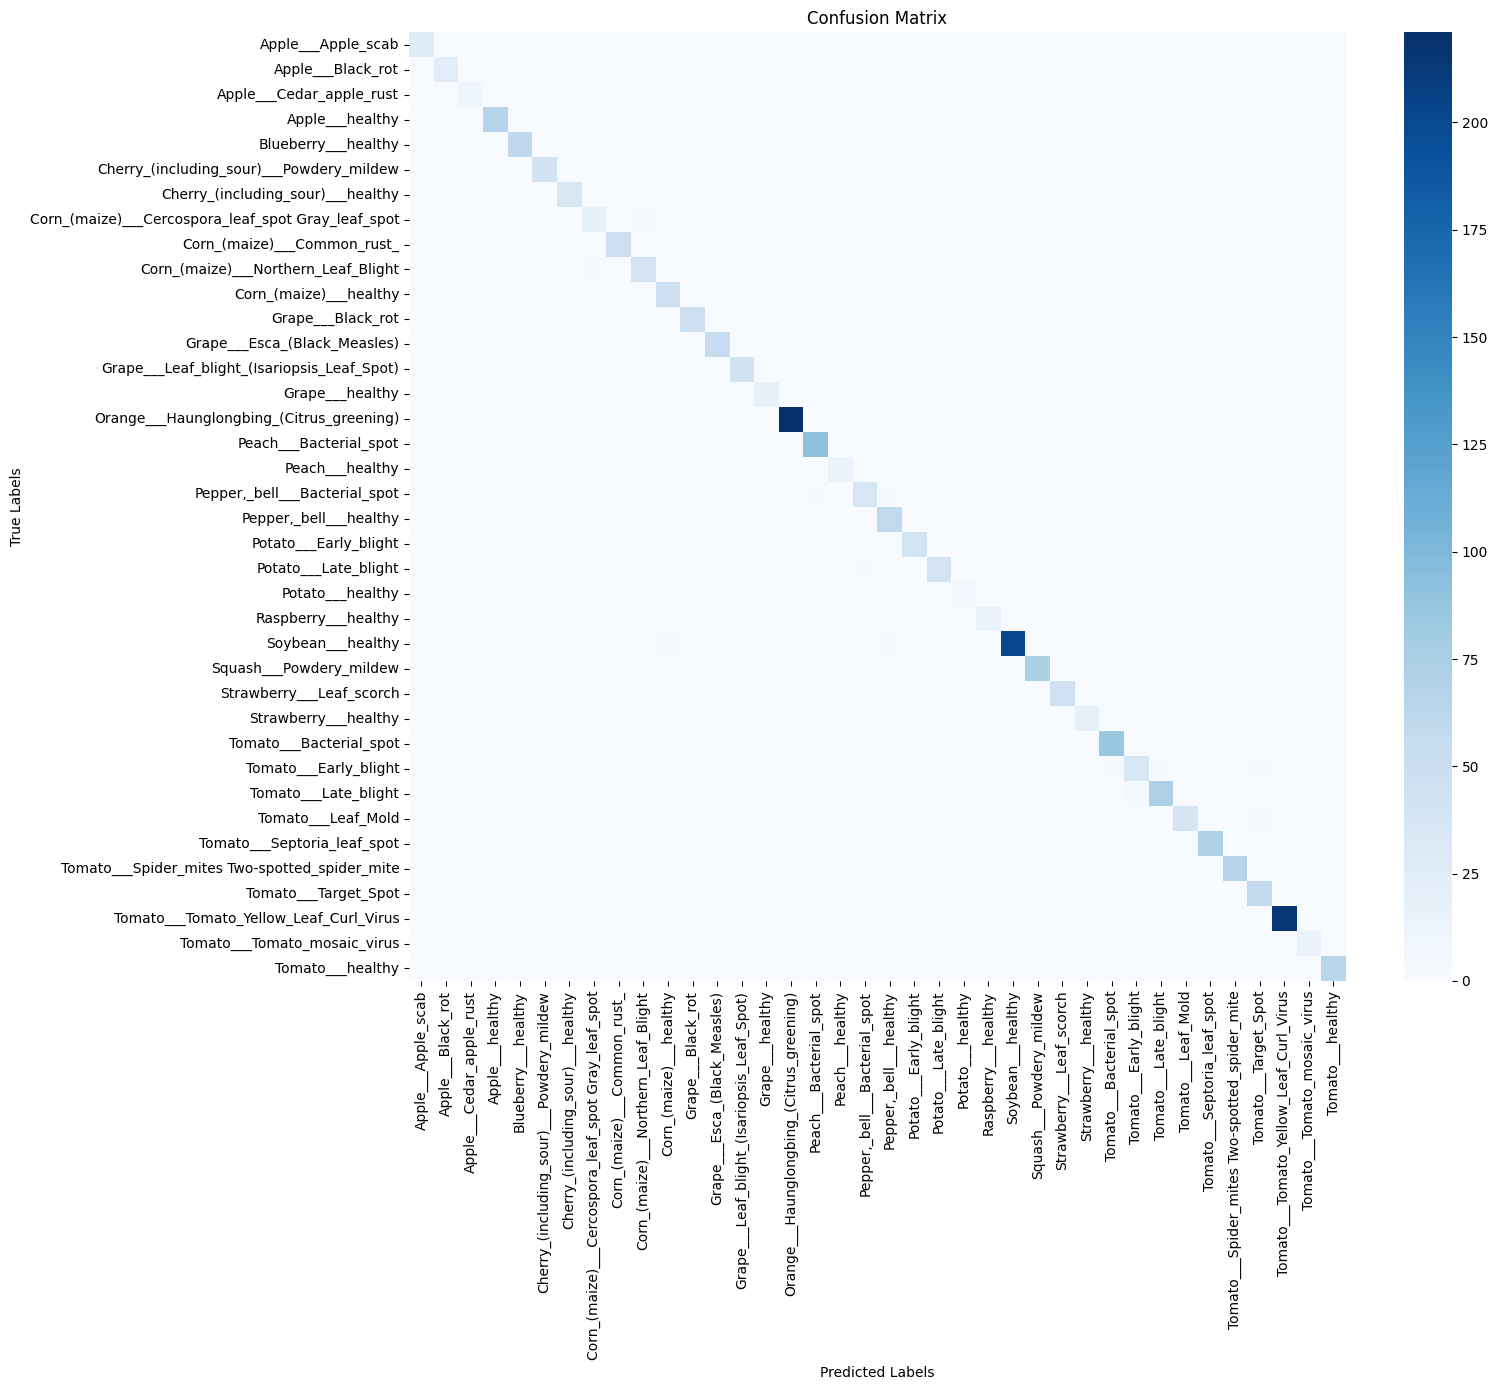

In [ ]:
# Confusion matrix
resnet_conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

# Plot with seaborn
plt.figure(figsize=(16, 14))
sns.heatmap(resnet_conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Part 3: Grad-Cam and Interpretability

For the last part, we focused on the interpretability of our models.

Neural Networks are known for working as *black boxes*, which make it difficult to understand how they work or, specifically to our task, how they classify the images.

Grad-CAM (Gradient-weighted Class Activation Mapping) allows us to visualize the regions of the imput image where the model focus the most for its predictions.

It works by analyzing the gradients of a target class score with respect to the feature maps in the last convolutional layer. These gradients show how important each feature map is for predicting that class. By **averaging** the **gradients across the spatial dimensions**, we assign weights to each feature map, and then we combine them to create a heatmap.
This heatmap highlights the regions in the image that had the most influence on the model’s decision: warmer colors (red/yellow) show where the model focused the most.

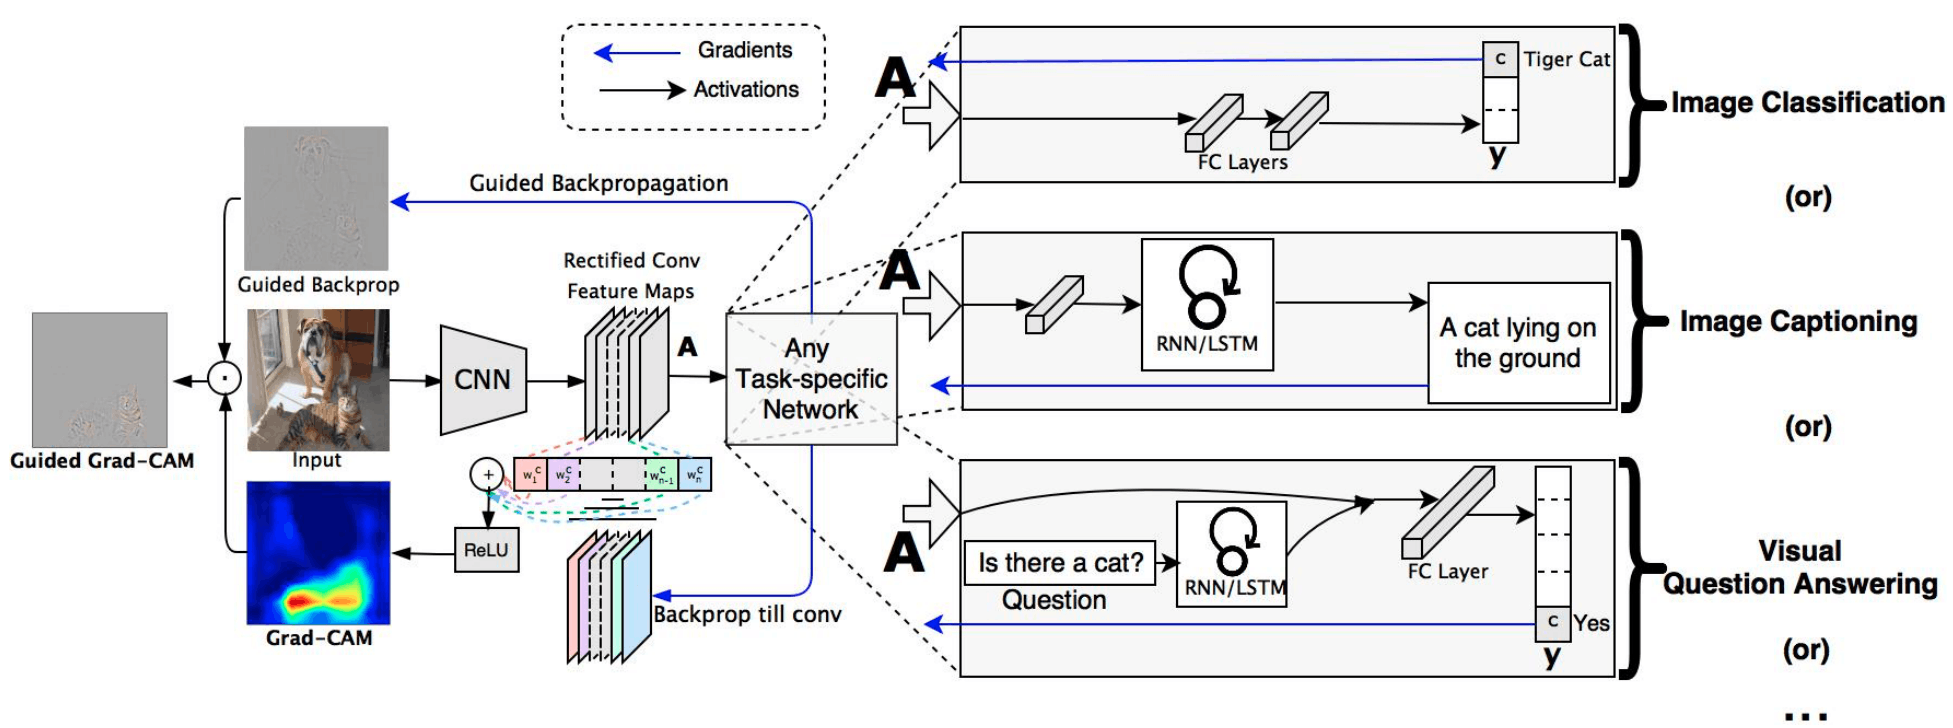

In [ ]:
# resnet50_plant_disease.keras --> resnet50
# functional_custom_model.keras --> simple model

#### Resnet50 - Keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Image

In [ ]:
# Load trained model (if not already in memory)
resnet_model = models.load_model('/content/drive/MyDrive/resnet50_plant_desease.keras')

# Check model.summary() to confirm layers correct name
resnet_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 70,890,484 (270.43 MB)

 Trainable params: 23,612,454 (90.07 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,224,910 (180.15 MB)

In [ ]:
# Define parameters
last_conv_layer_name = 'conv5_block3_2_conv'
img_size = (224, 224)
img_path = '/content/PlantVillage/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/0a9560c4-1430-4514-93c4-7036f6fee43d___UF.GRC_YLCV_Lab 01280.JPG'

In [ ]:
# Prepare the image
def get_img_array(img_path, size):
    img = load_img(img_path, target_size=size)
    array = img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

img_array = get_img_array(img_path, img_size)

# Definition of a function for Creating Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.input],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_output = predictions[:, pred_index]

    grads = tape.gradient(class_output, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())
    return heatmap.numpy()

# Generate heatmap
heatmap = make_gradcam_heatmap(img_array, resnet_model, last_conv_layer_name)

# Definition of a function for Overlaying heatmap on image
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = load_img(img_path)
    img = img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = mpl.colormaps["jet"]
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)
    superimposed_img.save(cam_path)

    display(Image(cam_path))

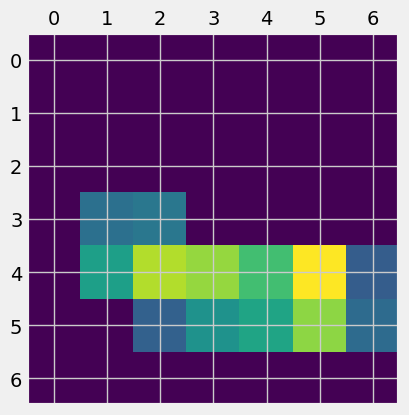

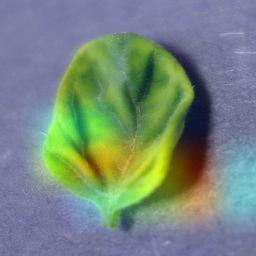

In [ ]:
# Display heatmap
plt.matshow(heatmap)
plt.show()

# Show final image
save_and_display_gradcam(img_path, heatmap)

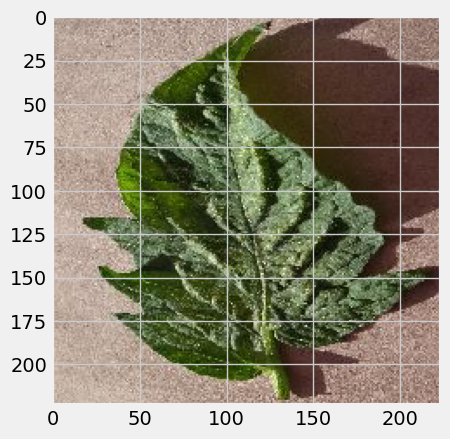

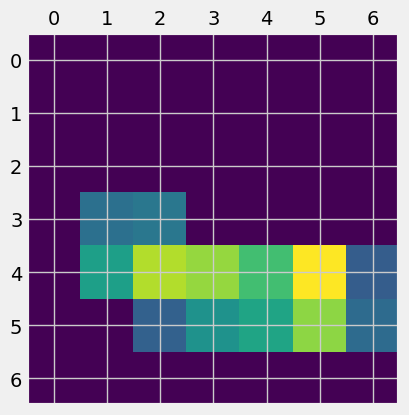

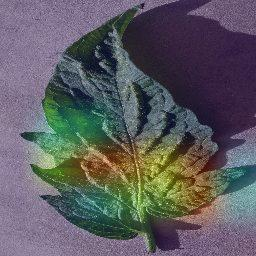

In [ ]:
# Display original image - Plant: Tomato - Desease: Spider Mites
img_path = '/content/PlantVillage/val/Tomato___Spider_mites Two-spotted_spider_mite/012369f5-ca64-4811-888f-35d75f7f7c2b___Com.G_SpM_FL 8911.JPG'
img_array = get_img_array(img_path, img_size)

plt.imshow(img_array[0])
plt.show()

# Display Heatmap
heatmap = make_gradcam_heatmap(img_array, resnet_model, last_conv_layer_name)
plt.matshow(heatmap)
plt.show()

# Show final image
save_and_display_gradcam(img_path, heatmap)

#### Custom CNN - Keras

Although Grad-CAM is typically applied to the final convolutional layer of a CNN, in this project, the second-last convolutional layer was used instead.

The reason is that the last convolutional layer in the custom model produced heatmaps that were diffuse and lacked clear focus, likely due to reduced spatial resolution or overly abstracted features at that stage.

In contrast, the second-last layer retained sufficient spatial information. As a result, the Grad-CAM heatmaps generated from this layer more accurately highlighted the regions of the leaf that contributed to the model's predictions, providing more meaningful and interpretable visual explanations of model behavior.

In [ ]:
# functional_custom_model.keras

In [ ]:
# Load trained model (if not already in memory)
functional_model = models.load_model('/content/drive/MyDrive/functional_custom_model.keras')

In [ ]:
# Check model.summary() to confirm layers correct name
functional_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,700,116 (63.71 MB)

 Trainable params: 5,566,630 (21.24 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 11,133,262 (42.47 MB)

In [ ]:
# Define parameters
last_conv_layer_name = 'conv2d_1'
img_size = (224, 224)
img_path = '/content/PlantVillage/val/Tomato___Spider_mites Two-spotted_spider_mite/012369f5-ca64-4811-888f-35d75f7f7c2b___Com.G_SpM_FL 8911.JPG'

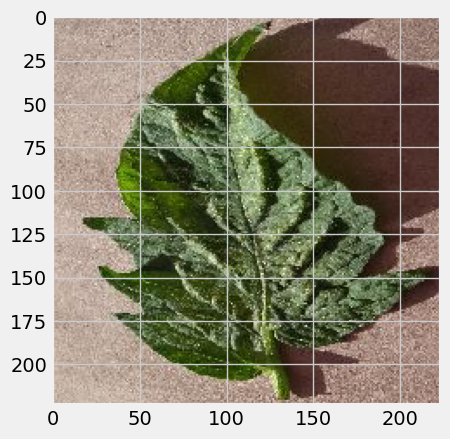

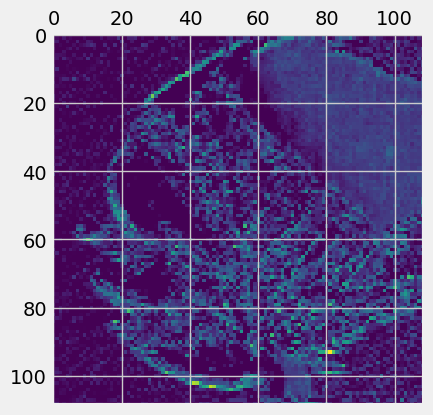

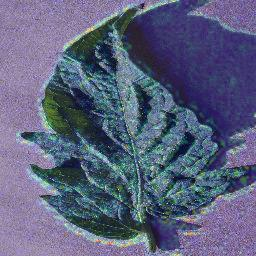

In [ ]:
# Plot
img_array = get_img_array(img_path, img_size)

plt.imshow(img_array[0])
plt.show()

heatmap = make_gradcam_heatmap(img_array, functional_model, last_conv_layer_name)
plt.matshow(heatmap)
plt.show()

save_and_display_gradcam(img_path, heatmap)

In [ ]:
# Define parameters
last_conv_layer_name = 'conv2d_1'
img_size = (224, 224)
img_path = '/content/PlantVillage/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/0a9560c4-1430-4514-93c4-7036f6fee43d___UF.GRC_YLCV_Lab 01280.JPG'

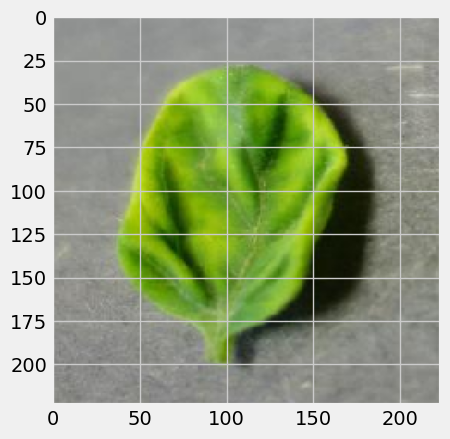

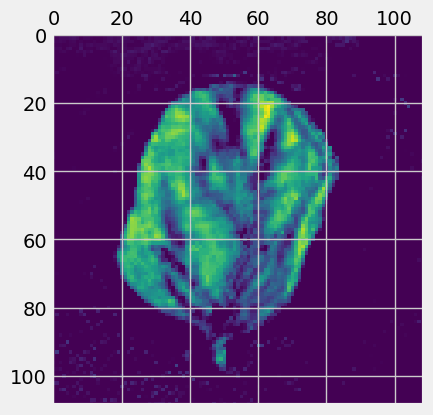

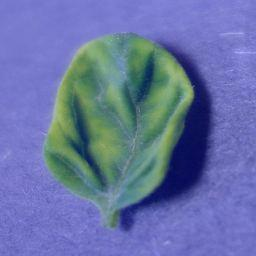

In [ ]:
# Plot
img_array = get_img_array(img_path, img_size)

plt.imshow(img_array[0])
plt.show()

heatmap = make_gradcam_heatmap(img_array, functional_model, last_conv_layer_name)
plt.matshow(heatmap)
plt.show()

save_and_display_gradcam(img_path, heatmap)